## Φόρτωση βιβλιοθηκών

In [2]:
import cornac
from cornac.eval_methods import RatioSplit
from cornac.metrics import MAE, RMSE, Precision, Recall, AUC, MAP, NDCG
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
import pickle

import os
folder = 'C:\\Users\\Greg\\Python\\RecSys'
os.chdir(folder)

#get data using Reader object
from cornac.data import Reader
reader = Reader()
pharma_data = reader.read('dbo_PATIENT-DRUGS-COUNT.txt',fmt='UIR', sep=',')
pharma2 = [(item[0], item[1], min(item[2], 10)) for item in pharma_data] #if labels < 10, make it 10



FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.


## Φόρτωση δεδομένων
Φορτώνουμε τα δεδομένα, δείχνουμε την κατανομή των labels και τέλος τα χωρίζουμε σε train και test υποσύνολα με αναλογία 80%-20%.

In [3]:
labels = [item[2] for item in pharma2]
#plt.plot(np.sort(labels))


rs = RatioSplit(data=pharma2, test_size=0.2, rating_threshold=1.5, seed=123)

#g = cornac.data.graph.GraphModality(data=pharma2)
#rs_g = RatioSplit(data=pharma2, test_size=0.2, rating_threshold=1.5, seed=123, item_graph=g)


## Αλγόριθμος SVD με εύρεση βέλτιστων παραμέτρων με grid search

In [4]:
#%% gGrid search
from cornac.hyperopt import Discrete, Continuous
from cornac.hyperopt import GridSearch

ratio_split  = RatioSplit(data=pharma2, test_size=0.1, val_size = 0.1, rating_threshold=1.5, seed=123)

#SVD 
svd = cornac.models.SVD(
    k=15, max_iter=50, learning_rate=0.01, lambda_reg=0.02, verbose=True
)

rmse = cornac.metrics.RMSE()

gs = GridSearch(
    model=svd,
    space=[
        Discrete("k", [5, 10, 15, 20, 25, 30]),
        Discrete("learning_rate", [1e-1, 1e-2, 1e-3, 1e-4]),
        Discrete("lambda_reg", [1e-1, 1e-2, 1e-3, 1e-4]),
    ],
    metric=rmse,
    eval_method=ratio_split
)

cornac.Experiment(
    eval_method=ratio_split,
    models=[gs],
    metrics=[rmse],
    user_based=False
).run()


Evaluating: {'k': 5, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 5, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!


D:\anaconda\envs\py37\lib\site-packages\cornac\utils\common.py:93: RuntimeWarning: invalid value encountered in less
  values = np.where(values < lower_bound, lower_bound, values)


Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.0001}


D:\anaconda\envs\py37\lib\site-packages\cornac\hyperopt.py:161: RuntimeWarning: invalid value encountered in less
  if compare_op(score, self.best_score):



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Best parameter settings: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.001}
RMSE = 1.7697

VALIDATION:
...
               |   RMSE | Time (s)
-------------- + ------ + --------
GridSearch_SVD | 1.7697 |   0.3220

TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
GridSearch_SVD | 1.7805 |   96.1142 |   0.3438



Οι καλύτερες παράμετροι είναι: 
k = 25, lambda_reg = 0.001, learning_rate = 0.001

## Αλγόριθμος UserKNN με εύρεση βέλτιστων παραμέτρων με grid search

In [5]:
#UserKNN
user_knn_pearson = cornac.models.UserKNN(
    k=25, similarity="pearson", name="UserKNN-Pearson"
)
gs = GridSearch(
    model=user_knn_pearson,
    space=[
        Discrete("k", [5, 10, 15, 20, 25, 30])
    ],
    metric=rmse,
    eval_method=ratio_split
)

cornac.Experiment(
    eval_method=ratio_split,
    models=[gs],
    metrics=[rmse],
    user_based=False
).run()

Evaluating: {'k': 5}



Evaluating: {'k': 10}



Evaluating: {'k': 15}



Evaluating: {'k': 20}



Evaluating: {'k': 25}



Evaluating: {'k': 30}



Best parameter settings: {'k': 30}
RMSE = 1.8270

VALIDATION:
...
                           |   RMSE | Time (s)
-------------------------- + ------ + --------
GridSearch_UserKNN-Pearson | 1.8270 |   2.4301

TEST:
...
                           |   RMSE | Train (s) | Test (s)
-------------------------- + ------ + --------- + --------
GridSearch_UserKNN-Pearson | 1.8444 |   19.4483 |   2.5480



Καλύτερη παράμετρος: K = 40

## Αλγόριθμος ItemKNN με εύρεση βέλτιστων παραμέτρων με grid search

In [6]:
#itemKnn
item_knn_pearson = cornac.models.ItemKNN(
    k=25, similarity="pearson", name="ItemKNN-Pearson"
)
gs = GridSearch(
    model=item_knn_pearson,
    space=[
        Discrete("k", [5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
    ],
    metric=rmse,
    eval_method=ratio_split
)

cornac.Experiment(
    eval_method=ratio_split,
    models=[gs],
    metrics=[rmse],
    user_based=False
).run()

Evaluating: {'k': 5}



Evaluating: {'k': 10}



Evaluating: {'k': 15}



Evaluating: {'k': 20}



Evaluating: {'k': 25}



Evaluating: {'k': 30}



Evaluating: {'k': 35}



Evaluating: {'k': 40}



Evaluating: {'k': 45}



Evaluating: {'k': 50}



Best parameter settings: {'k': 35}
RMSE = 1.9848

VALIDATION:
...
                           |   RMSE | Time (s)
-------------------------- + ------ + --------
GridSearch_ItemKNN-Pearson | 1.9848 |   3.2900

TEST:
...
                           |   RMSE | Train (s) | Test (s)
-------------------------- + ------ + --------- + --------
GridSearch_ItemKNN-Pearson | 2.0190 |   30.4743 |   4.3820



Βέλτιστη παράμετρος k=35

## Αλγόριθμος NMF με εύρεση βέλτιστων παραμέτρων με grid search

In [7]:
# Instantiate a NMF recommender model.
nmf = cornac.models.NMF(
    k=15,
    max_iter=50,
    learning_rate=0.01,
    use_bias=False,
    verbose=True,
    seed=123,
)

gs = GridSearch(
    model=nmf,
    space=[
        Discrete("k", [10, 15, 20, 25, 30]),
        Discrete("learning_rate", [1e-1, 1e-2, 1e-3, 1e-4]),
        Discrete("lambda_reg", [1e-1, 1e-2, 1e-3, 1e-4]),
    ],
    metric=rmse,
    eval_method=ratio_split
)

cornac.Experiment(
    eval_method=ratio_split,
    models=[gs],
    metrics=[rmse],
    user_based=False
).run()

Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 10, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 15, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 20, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 25, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.0001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.001, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.01, 'learning_rate': 0.1}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.0001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.001}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.01}



Optimization finished!
Evaluating: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.1}



Optimization finished!
Best parameter settings: {'k': 30, 'lambda_reg': 0.1, 'learning_rate': 0.0001}
RMSE = 1.7835

VALIDATION:
...
               |   RMSE | Time (s)
-------------- + ------ + --------
GridSearch_NMF | 1.7835 |   0.5305

TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
GridSearch_NMF | 1.7919 |  214.0257 |   0.5467



Καλύτεροι παράμετροι: k = 30, lambda_reg = 0.1, learning_rate = 0.0001

## Αλγόριθμος MLP με εύρεση βέλτιστων παραμέτρων με grid search

In [8]:
#mlp
mlp = cornac.models.ncf.recom_mlp.MLP()

gs = GridSearch(
    model=nmf,
    space=[
        Discrete("layers", [(64,32,16,8), (32, 16,8)]),
        Discrete("lr", [1e-1, 1e-2, 1e-3, 1e-4]),
    ],
    metric=rmse,
    eval_method=ratio_split
)

cornac.Experiment(
    eval_method=ratio_split,
    models=[gs],
    metrics=[rmse],
    user_based=False
).run()

Evaluating: {'layers': (32, 16, 8), 'lr': 0.0001}



Optimization finished!
Evaluating: {'layers': (32, 16, 8), 'lr': 0.001}



Optimization finished!
Evaluating: {'layers': (32, 16, 8), 'lr': 0.01}



Optimization finished!
Evaluating: {'layers': (32, 16, 8), 'lr': 0.1}



Optimization finished!
Evaluating: {'layers': (64, 32, 16, 8), 'lr': 0.0001}



Optimization finished!
Evaluating: {'layers': (64, 32, 16, 8), 'lr': 0.001}



Optimization finished!
Evaluating: {'layers': (64, 32, 16, 8), 'lr': 0.01}



Optimization finished!
Evaluating: {'layers': (64, 32, 16, 8), 'lr': 0.1}



Optimization finished!
Best parameter settings: {'layers': (32, 16, 8), 'lr': 0.0001}
RMSE = 1.8571

VALIDATION:
...
               |   RMSE | Time (s)
-------------- + ------ + --------
GridSearch_NMF | 1.8571 |   0.5048

TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
GridSearch_NMF | 1.8648 |   18.6053 |   0.5197



## Αλγόριθμος NCF με εύρεση βέλτιστων παραμέτρων με grid search

In [9]:
#neural collaborative filtering
NCF = cornac.models.ncf.recom_gmf.GMF()

gs = GridSearch(
    model=NCF,
    space=[
        Discrete("num_factors", [5,10,20])
    ],
    metric=rmse,
    eval_method=ratio_split
)

cornac.Experiment(
    eval_method=ratio_split,
    models=[gs],
    metrics=[rmse],
    user_based=False
).run()

Evaluating: {'num_factors': 5}



Evaluating: {'num_factors': 10}



Evaluating: {'num_factors': 20}



Best parameter settings: {'num_factors': 5}
RMSE = 2.4794

VALIDATION:
...
               |   RMSE | Time (s)
-------------- + ------ + --------
GridSearch_GMF | 2.4794 |  10.0555

TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
GridSearch_GMF | 2.5247 | 1949.3694 |   9.0282



## Δημιουργία και εκτέλεση βέλτιστων μοντέλων

In [10]:
#create models
#SVD 
svd = cornac.models.SVD(
    k=25, learning_rate=0.001, lambda_reg=0.001, verbose=True
)

# Instantiate a NMF recommender model.
nmf = cornac.models.NMF(
    k=30,
    learning_rate=0.1,
    lambda_reg=0.0001,
    use_bias=False,
    verbose=True,
    seed=123,
)

# UserKNN methods
user_knn_pearson = cornac.models.UserKNN(
    k=40, similarity="pearson", name="UserKNN-Pearson"
)
# ItemKNN methods
item_knn_pearson = cornac.models.ItemKNN(
    k=35, similarity="pearson", name="ItemKNN-Pearson"
)

#neural networks
mlp = cornac.models.ncf.recom_mlp.MLP(layers=(32,16,8), lr=0.0001)

NCF = cornac.models.ncf.recom_gmf.GMF(num_factors = 5)

# initialize models
models = [
    svd, user_knn_pearson, item_knn_pearson, nmf, mlp, NCF
]

# define metrics to evaluate the models
metrics = [MAE(), RMSE(), Precision(k=100), Recall(k=100),AUC(), NDCG(5)]

# put it together in an experiment, voilà!
experiment = cornac.Experiment(eval_method=rs, models=models, metrics=metrics, user_based=True)
experiment.run()

# save
models_2 = models
for i in range(len(models)):
    f = models[i].save(folder)
    print(f)


Optimization finished!



Optimization finished!




TEST:
...
                |    MAE |   RMSE |    AUC | NDCG@5 | Precision@100 | Recall@100 | Train (s) | Test (s)
--------------- + ------ + ------ + ------ + ------ + ------------- + ---------- + --------- + --------
SVD             | 1.1555 | 1.5053 | 0.6258 | 0.0296 |        0.0234 |     0.3788 |    0.4897 |   8.5253
UserKNN-Pearson | 1.0332 | 1.4102 | 0.6839 | 0.0002 |        0.0028 |     0.0409 |    1.4481 |  52.3292
ItemKNN-Pearson | 1.1609 | 1.5110 | 0.5485 | 0.0001 |        0.0004 |     0.0055 |    0.8361 |  57.8195
NMF             | 4.1299 | 4.7097 | 0.7283 | 0.0010 |        0.0062 |     0.1037 |    2.6169 |   7.2790
MLP             | 1.0648 | 1.7799 | 0.9297 | 0.1176 |        0.0368 |     0.5625 |  658.8178 |  32.0419
GMF             | 1.0648 | 1.7799 | 0.9509 | 0.1172 |        0.0407 |     0.6320 |  672.5264 |  26.7488

SVD model is saved to C:\Users\Greg\Python\RecSys\SVD\2022-09-17_17-34-06-532977.pkl
C:\Users\Greg\Python\RecSys\SVD\2022-09-17_17-34-06-532977.pkl
UserKNN

## Δημιουργία καμπύλων AUC-ROC και Precision-Recall
Για κάθε μοντέλο, κάνουμε δυαδικές τις τιμές του label και του prediction score και υπολογίζουμε τα FPR, TPR, Precision, Recall, τα οποία σχεδιάζουμε στα αντίστοιχα διαγράμματα.

In [11]:
data_test = rs.test_set.uir_tuple
labels = data_test[2]    
#make it binary
labels[labels<2] = 0
labels[labels>=2] = 1

SVD
0.7073711394997768
UserKNN-Pearson
0.7175664281851408
ItemKNN-Pearson
0.638544208477216
NMF
0.6911349515626223
MLP
0.6032733113511308
GMF
0.5959397239655274


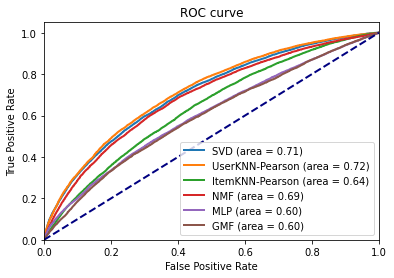

SVD
0.6938700668273783
UserKNN-Pearson
0.7007797026827507
ItemKNN-Pearson
0.6110952766997578
NMF
0.6693227465961649
MLP
0.6011083043599705
GMF
0.5811271219228662


<Figure size 432x288 with 0 Axes>

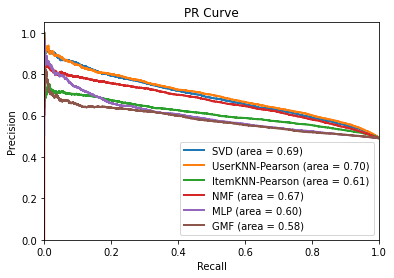

<Figure size 432x288 with 0 Axes>

In [12]:
#caluclate ROC and PR and plot
A = len(models)
scores_all = np.zeros((len(labels),A))    
for i in range(A):
    s = np.zeros(len(labels))
    #get users from data_test and predict score
    for j in range(data_test[0].shape[0]):
        user = data_test[0][j]
        item = data_test[1][j]
        s[j] = models[i].score(user, item) 
    
    
    s = s / max(s) #make it from 0-1
    scores_all[:,i]=s


np.save('scores.npy',scores_all)

plt.figure()
lw = 2
for i in range(A):    
    fpr, tpr, _ = roc_curve(labels, scores_all[:,i])
    roc_auc = auc(fpr, tpr)    
    
    print(models[i].name)
    print(roc_auc)
        
    plt.plot(fpr, tpr, 
             lw=lw, label= models[i].name + ' (area = %0.2f)' % roc_auc)

    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title= 'ROC curve'
plt.title(title)
plt.legend(loc="lower right")
plt.show()
plt.savefig(title + '.png')
    

plt.figure()
lw = 2
for i in range(A):    
    pr, rec, thr = precision_recall_curve(labels, scores_all[:,i])
    avg_pr = average_precision_score(labels, scores_all[:,i])
    
    print(models[i].name)
    print(avg_pr)
    
    
    plt.plot(rec, pr, 
             lw=lw, label=models[i].name + ' (area = %0.2f)' % avg_pr)
    
title = 'PR curve'
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig(title + '.png')

## NDCG metric

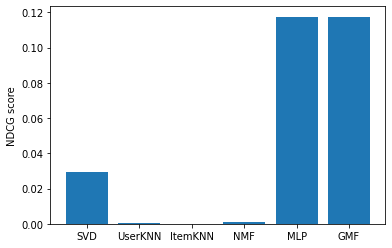

In [13]:
names = ['SVD', 'UserKNN', 'ItemKNN', 'NMF', 'MLP', 'GMF']
#ndcg_metric = [0.0302, 0.0002, 0.0001, 0.0053, 0.1164]
ndcg_metric = [experiment.result[i].metric_avg_results['NDCG@5'] for i in range(A)]
plt.figure()
plt.bar([1,2,3,4,5,6],ndcg_metric,tick_label=names)
plt.ylabel('NDCG score')
plt.savefig('ndcg.png')



## Safety score
Πρώτα φορτώνουμε το αρχείο με τις παρενέργειες και δημιουργούμε έναν πίνακα ΝxΝ, όπου Ν το πλήθος των φαρμάκων με 1 αν έχουν παρενέργειες, αλλιώς 0. Στη συνέχεια ορίζουμε τη συνάρτηση που υπολογίζει το safety score με βάση τις προβλέψεις και αυτό τον πίνακα.

In [14]:
ddi_file = 'DrugDrugInteractions.txt'

import csv
drug1 = []
drug2 = []
with open(ddi_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        drug1.append('"' + row[0] + '"')
        drug2.append('"' + row[1] + '"')
        line_count += 1
    print(f'Processed {line_count} lines.')
    
#get drug indexes
iid = rs.global_iid_map
    
drug1_id = []
drug2_id = []    
for i in range(len(drug1)):
    if (drug1[i] in iid) and (drug2[i] in iid):
        d1 = iid[drug1[i]]
        d2 = iid[drug2[i]]
        drug1_id.append(d1)
        drug2_id.append(d2)

#create an adjacency matrix (1 if drugs connected, else 0)    
import scipy    
N = max(max(drug1_id), max(drug2_id))+1    
ddi_s = scipy.sparse.csr_matrix((np.ones(len(drug1_id)), (drug1_id, drug2_id)), shape=(N, N)) 
    

Processed 1805374 lines.


In [15]:
def safety(data_test, labels, ddi):
    score = []
    users = data_test[0]
    drugs = data_test[1]
    checked = []
    for i in range(users.shape[0]):
        #get user i and see if we already calculated a score for him
        user = users[i]
        if user in checked:
            continue
        checked.append(user)
        
        #which drugs where recommended
        x = (users == user) & (labels == 1)
        d = drugs[x]
        
        #calculate safety score
        s = 0
        n = len(d)
        if n < 2:
            continue
        for j in range(n-1):
            for k in range(j+1,n):
                d1 = d[j]
                d2 = d[k]
                if ddi[d1,d2] == 1:
                    s = s + 1       
        s = s / (n*(n-1)/2)
        score.append(s)
    
    #mean across users
    score_avg = np.mean(score)
    return score_avg 

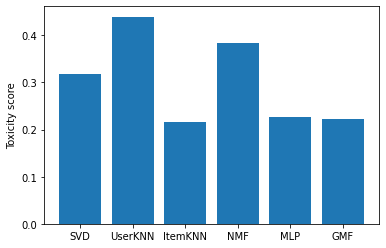

In [16]:
   

#print(safety(data_test, labels, ddi_s))
    
safety_score = []
for i in range(A):
    recommendation = scores_all[:,i].copy()
    recommendation[recommendation<0.5] = 0
    recommendation[recommendation>=0.5] = 1
    s = safety(data_test, recommendation, ddi_s)
    safety_score.append(s)
    
names = ['SVD', 'UserKNN', 'ItemKNN', 'NMF', 'MLP', 'GMF']

plt.figure()
plt.bar([1,2,3,4,5,6],safety_score,tick_label=names)
plt.ylabel('Toxicity score')
plt.savefig('safety.png')


## Υπολογισμός παρενεργειών στις top-5 προτάσεις

In [17]:
def topk_side_effects(data_test, scores, ddi, K=5):
    score = []
    users = data_test[0]
    drugs = data_test[1]
    checked = []
    for i in range(users.shape[0]):
        #get user i and see if we already calculated a score for him
        user = users[i]
        if user in checked:
            continue
        checked.append(user)
        
        #which drugs where recommended
        x = (users == user) 
        recomm = scores[x]
        idx = np.argsort(recomm)
        top5 = idx[-K:]
        
        d = drugs[top5]
        
        #calculate score
        s = 0
        n = len(d)
        if n < 2:
            score.append(s)
            continue
        for j in range(n-1):
            for k in range(j+1,n):
                d1 = d[j]
                d2 = d[k]
                if ddi[d1,d2] == 1:
                    s = s + 1       
        score.append(s)
    
    #mean across users
    score_avg = np.mean(score)
    return score_avg    

[2.3000852514919012, 2.28772378516624, 2.28772378516624, 2.268542199488491, 2.294543904518329, 2.2830349531116796]


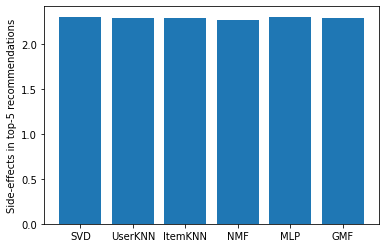

In [18]:
scores_all = np.load('scores.npy')

sc = []
for i in range(6):
    recommendation = scores_all[:,i]
    #print(recommendation)
    s = topk_side_effects(data_test, recommendation, ddi_s)
    
    sc.append(s)
    
    
print(sc)

names = ['SVD', 'UserKNN', 'ItemKNN', 'NMF', 'MLP', 'GMF']
plt.figure()
plt.bar([1,2,3,4,5,6],sc,tick_label=names)
plt.ylabel('Side-effects in top-5 recommendations')
plt.savefig('side.png')


## Re-ranking για τον SVD

SVD Reranking
0.6406815069741261


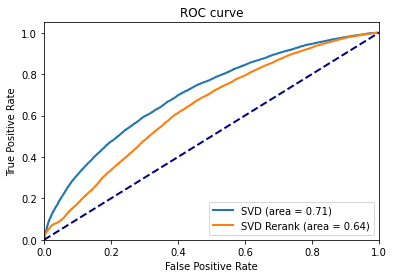

0.6938700668273783


<Figure size 432x288 with 0 Axes>

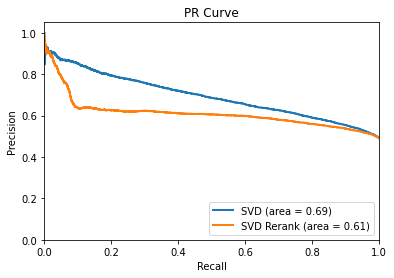

0.24183705864757973
2.3414322250639388


<Figure size 432x288 with 0 Axes>

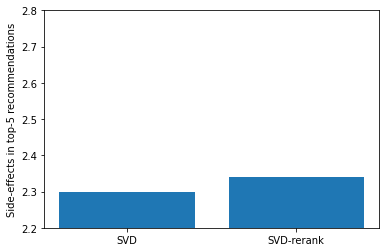

In [19]:
DF = np.sum(ddi_s, axis=0)
DF = np.ravel(DF)
DF = DF / np.max(DF) #make it 0-1

scores_all = np.load('scores.npy')

def rerank(data_test, DF, scores):
    score_rerank = scores.copy()
    drugs = data_test[1]
    checked = []
    
    for i in range(drugs.shape[0]):
        #get user i and see if we already calculated a score for him
        drug = drugs[i]
        if drug in checked:
            continue
        checked.append(drug)
        
        if DF[drug] == 0:
            continue
        
        x = np.where(drugs == drug)[0]
        for j in x:
            if scores[j] >= 0:
                    score_rerank[j] = scores[j] / DF[drug]
            else:
                score_rerank[j] = scores[j] * DF[drug]
                    
                    
    return score_rerank


score_rerank = rerank(data_test, DF, scores_all[:,0])        

fpr, tpr, _ = roc_curve(labels, scores_all[:,0])
roc_auc = auc(fpr, tpr)   

fpr2, tpr2, _ = roc_curve(labels, score_rerank)
roc_auc2 = auc(fpr2, tpr2)    

print("SVD Reranking")
print(roc_auc2)


plt.figure()
lw = 2
    
plt.plot(fpr, tpr, 
         lw=lw, label= 'SVD (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, 
         lw=lw, label= 'SVD Rerank (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title= 'ROC curve'
plt.title(title)
plt.legend(loc="lower right")
plt.show()
plt.savefig(title + '_rerank_both.png')
    


pr, rec, thr = precision_recall_curve(labels, scores_all[:,0])
avg_pr = average_precision_score(labels, scores_all[:,0])

pr2, rec2, thr2 = precision_recall_curve(labels, score_rerank)
avg_pr2 = average_precision_score(labels, score_rerank)

i=0
print(avg_pr)

plt.figure()
lw = 2

plt.plot(rec, pr, 
         lw=lw, label='SVD (area = %0.2f)' % avg_pr)
plt.plot(rec2, pr2, 
         lw=lw, label='SVD Rerank (area = %0.2f)' % avg_pr2)
    
title = 'PR curve'
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig(title + '_rerank_both.png')
        

recommendation = score_rerank.copy()

recommendation[recommendation<0.5] = 0
recommendation[recommendation>=0.5] = 1
s = safety(data_test, recommendation, ddi_s)
print(s)


sc2 = topk_side_effects(data_test, score_rerank, ddi_s, 5)    
print(sc2)

names = ['SVD', 'SVD-rerank']
plt.figure()
plt.bar([1,2],[sc[0], sc2],tick_label=names)
plt.ylim(2.2, 2.8)
plt.ylabel('Side-effects in top-5 recommendations')
plt.savefig('side2_svg_rerank.png')

## Παράδειγμα

In [20]:
# example
users = data_test[0]
drugs = data_test[1]
    
x = np.where(users==users[1])[0]
print("All drugs (test dataset) for user 1:")
print(drugs[x])
rec = scores_all[x,0]
idx = np.argsort(rec)
best = idx[-5:]
best = list(best)
best.reverse()
print("Best-5 drugs and score for user 1:")
print(drugs[best])
print(rec[best])

rec = score_rerank[x]
idx = np.argsort(rec)
best = idx[-5:]
best = list(best)
best.reverse()
print("Best-5 drugs and score for user 1 with re-ranking:")
print(drugs[best])
print(rec[best])

All drugs (test dataset) for user 1:
[ 690  106  753  131  137   71  656  589  192 1000  135  543]
Best-5 drugs and score for user 1:
[460 690 192  52 574]
[0.54988716 0.47644141 0.35409784 0.26081621 0.22538092]
Best-5 drugs and score for user 1 with re-ranking:
[690 102 460 574 131]
[155.22461185   9.00685938   0.6922459    0.52826693   0.42763552]
